In [4]:
import numpy as np
import matplotlib.pyplot as plt       # first of all I will import relevant library                                         
import seaborn as sns                 # Here I will use seaborn library 

In [5]:
raw_data = sns.load_dataset("iris")     # let's import the iris dataset
raw_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
raw_data.describe()           # from the describe() method we can see the average,min and max value of each observation columns .

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
raw_data.info()            # By the using info() method we can conclude that there is not any null raw.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# Here we will seprate our feature and target values by using iloc.

# feature = feature values, all the columns except the last column
feature = raw_data.iloc[:, :-1]

# target = target values, last column of the data frame
target = raw_data.iloc[:, -1]

In [9]:
feature

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
target

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

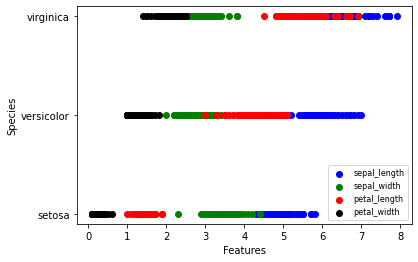

In [11]:
# Plot the relation of each feature with each species.


plt.xlabel('Features')
plt.ylabel('Species')

pltX = raw_data.loc[:, 'sepal_length']
pltY = raw_data.loc[:,'species']
plt.scatter(pltX, pltY, color='blue', label='sepal_length')

pltX = raw_data.loc[:, 'sepal_width']
pltY = raw_data.loc[:,'species']
plt.scatter(pltX, pltY, color='green', label='sepal_width')

pltX = raw_data.loc[:, 'petal_length']
pltY = raw_data.loc[:,'species']
plt.scatter(pltX, pltY, color='red', label='petal_length')

pltX = raw_data.loc[:, 'petal_width']
pltY = raw_data.loc[:,'species']
plt.scatter(pltX, pltY, color='black', label='petal_width')

plt.legend(loc=4, prop={'size':8})
plt.show()

In [12]:
from sklearn.decomposition import PCA
pca = PCA()
data_reduced = pca.fit_transform(feature)

In [13]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)

for i in range(1,len(per_var)+1):
    print(f"PC-{i}: {per_var[i-1]}")

PC-1: 92.5
PC-2: 5.3
PC-3: 1.7
PC-4: 0.5


In [14]:
labels = ['PC'+str(label) for label in range(1,len(per_var)+1)]
labels

['PC1', 'PC2', 'PC3', 'PC4']

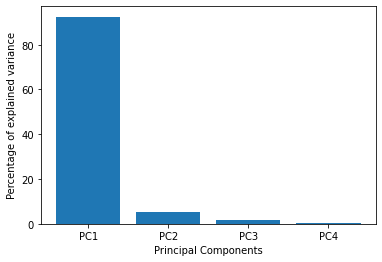

In [15]:
plt.bar(x=range(1,len(per_var)+1), height = per_var,tick_label=labels)

plt.xlabel("Principal Components")
plt.ylabel("Percentage of explained variance")
plt.show()

In [16]:
# Calculating the covariance matrix
iris_cov_matrix = np.cov(feature.T)
iris_cov_matrix

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [17]:
eig_vals, eig_vecs = np.linalg.eig(iris_cov_matrix)
print("EigenValues: ",eig_vals)
print()
print("EigenVectors: ",eig_vecs)

EigenValues:  [4.22824171 0.24267075 0.0782095  0.02383509]

EigenVectors:  [[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


In [18]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(feature)

In [19]:
from sklearn.decomposition import PCA
pca = PCA()
data_reduced = pca.fit_transform(X_std)

In [20]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)

for i in range(1,len(per_var)+1):
    print(f"PC-{i}: {per_var[i-1]}")

PC-1: 73.0
PC-2: 22.9
PC-3: 3.7
PC-4: 0.5


In [21]:
labels = ['PC'+str(label) for label in range(1,len(per_var)+1)]
labels

['PC1', 'PC2', 'PC3', 'PC4']

In [22]:
# by using train_test_split 

from sklearn.model_selection import train_test_split

In [23]:
# This train_test_split will automatically split the data into 80% training and 20% testing

x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=98)

In [24]:
# now time to implement SVM on IRIS dataset
# for that we have to first import below libraries.

from sklearn import svm

In [25]:
operation = svm.SVC(kernel='linear',C=1)
operation.fit(x_train,y_train)


SVC(C=1, kernel='linear')

In [26]:
y_pred = operation.predict(x_test)

In [27]:
# Now time to create confusion matrix
# So I will import below library.

from sklearn.metrics import classification_report, confusion_matrix

confusion = confusion_matrix(y_test,y_pred)
print(confusion)

[[ 8  0  0]
 [ 0 13  3]
 [ 0  0  6]]


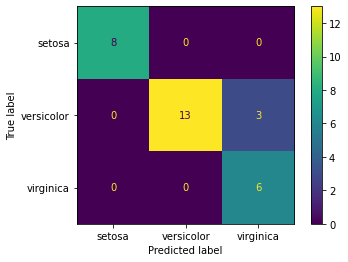

In [28]:
# Now time to visualize confusion  matrix 

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(operation, x_test, y_test)  
plt.show()

In [29]:
#Now time to find accuracies and standard deviation
# import below once

from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = operation, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 98.33 %
Standard Deviation: 5.00 %
